# Métodos de filtrado

En este notebook se revisarán los conceptos de:

1. Métodos de filtrado para regresión
2. Métodos de filtrado para clasificación
3. Métodos de filtrado en un problema realista

Primero cargamos librerías y funciones necesarias



In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

# 1. Métodos de filtrado para regresión

Vamos a analizar los métodos de [filtrado](http://scikit-learn.org/stable/modules/feature_selection.html) para regresión:

* [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)
* [mutual_info_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression)

mediante un ejemplo sencillo.

### Ejemplo 
Se tienen tres variables $x_1, x_2,x_3$, las cuales son variables aleatorias que se distribuyen uniformemente en el intervalo $[0,1]$. La salida depende de estas variables de la forma  

$$y = x_1 + \sin{(6\pi x_2)} + 0.1\mathcal{N}(0, 1),$$

Esto es:

* $y$ depende linealmente de $x_1$
* $y$ depende no linealmente de $x_2$
* $y$ no depende de $x_3$

Por tanto, $x_3$ es una variable irrelevante para $y$. Veamos qué nos dicen nuestros test de filtrado de selección de características

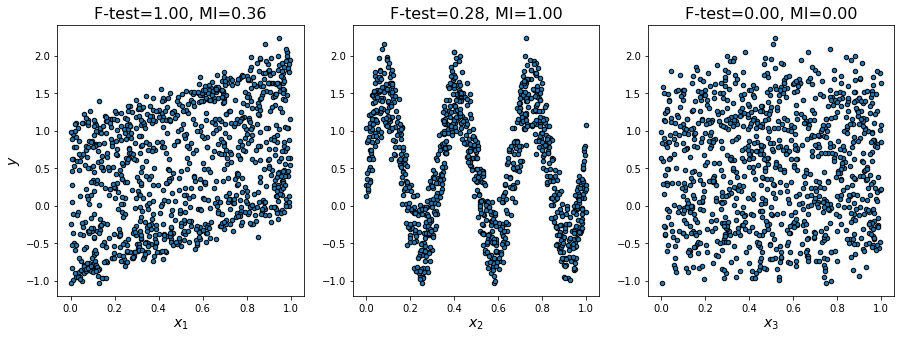

In [3]:
# Este ejemplo, tomado de:
# http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.show()

# 2. Métodos de filtrado para clasificación

Vamos a analizar los mismos métodos de [filtrado](http://scikit-learn.org/stable/modules/feature_selection.html) que en el caso de regresión, aplicados ahora para distintos problemas de clasificación:

* [f_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif)
* [mutual_info_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)

## 2.1 Problema de clasificación linealmente separable

En este problema, la variable $x_1$ define un problema linealmente separable y constituye la variable informativa. $x_2$ representa una variable redundante, mientras que $x_3$ y $x_4$ son variables ruidosas (no aportan información).


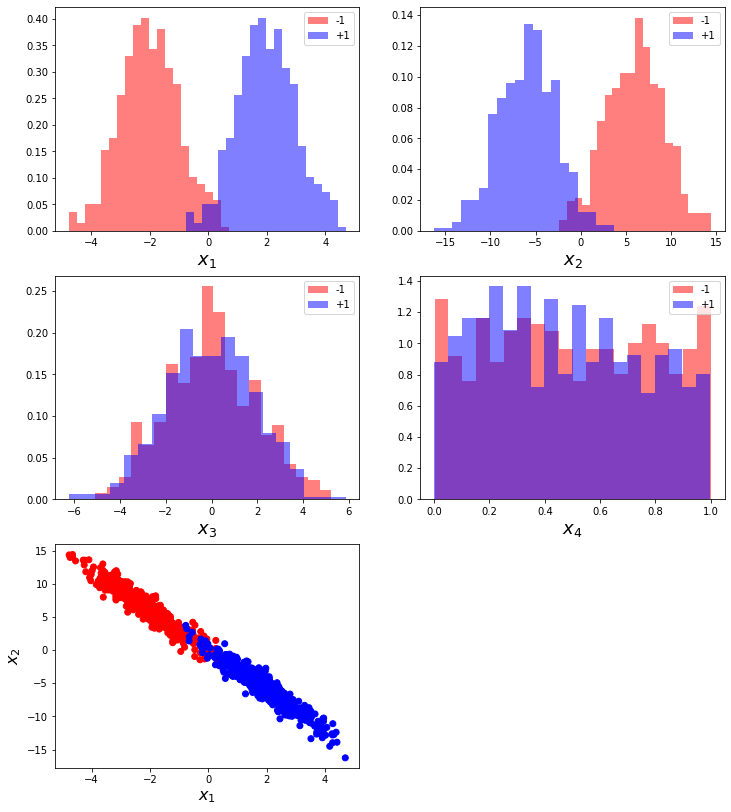

In [4]:
# toy example: linearly separable problem
np.random.seed(0)

# -- parameters
N      = 1000
mu     = 2      # CHANGE THIS VALUE
sigma1 = 1      # CHANGE THIS VALUE
sigma2 = 1      # CHANGE THIS VALUE

# -- variables auxiliares
unos  = np.ones(int(N/2))
rand2 = np.random.randn(int(N/2),1)

# -- features
y  = np.concatenate([-1*unos,unos]) 
X1 = np.concatenate([-mu + sigma1*rand2,mu + sigma1*rand2])
X2 = sigma2*np.random.randn(N,1) - 3*X1

X3 = 2*np.random.randn(N,1)
X4 = np.random.rand(N,1)

X  = np.hstack((X1,X2,X3,X4))

#--- do some plotting
plt.figure(figsize=(12, 14))
for i in range(4):
    plt.subplot(3, 2, i + 1)
    plt.hist(X[y<0,i],bins=20, normed=True, alpha=0.5, label='-1',color='r')
    plt.hist(X[y>0,i], bins=20, normed=True, alpha=0.5, label='+1',color='b')
    plt.legend(loc='upper right')
    plt.xlabel("$x_{}$".format(i + 1), fontsize=18)
#pyplot.show()

#plt.figure(figsize=(18, 5))
plt.subplot(3, 2, 5)
plt.scatter(X1,X2,c=y.reshape(-1,1),cmap=cm_bright)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.show()

Apliquemos los métodos de filtrado

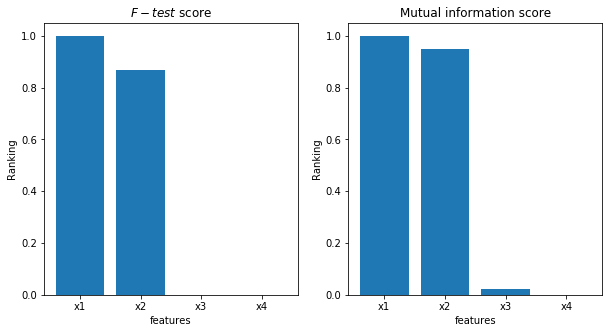

In [5]:
from sklearn.feature_selection import f_classif, mutual_info_classif

featureNames = ['x1','x2','x3','x4']

# do calculations
f_test, _ = f_classif(X, y)
f_test /= np.max(f_test)

mi = mutual_info_classif(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),featureNames)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-test$ score')


plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi,  align="center")
plt.xticks(range(X.shape[1]),featureNames)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

<div class = "alert alert-success">
**EJERCICIO:** Modifica los parámetros *mu*, *sigma1*, y *sigma2* y analiza sus efectos en las representaciones anteriores.  ¿Qué variable puedes considerar relevante?
</div>

# 2.2 Problema de clasificación no linealmente separable

Vamos a analizar el problema XOR, definido por las variables $x_1$ y $x_2$. Añadimos además dos variables relevantes $x_3$ y $x_4$, con capacidad discriminatoria y que por tanto pueden ayudar a mejorar las prestaciones del problema de clasificación bajo estudio. Por último, se incluyen 20 variables ruidosas irrelevantes.


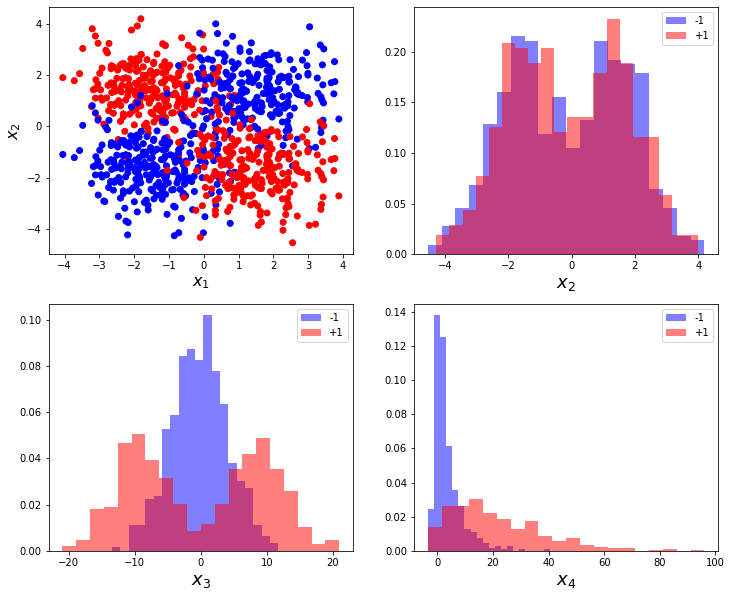

In [6]:
np.random.seed(0)

# -- parameters
N     = 1000
mu    = 1.5      # Cambia este valor
sigma = 1      # Cambia este valor

# variables auxiliares
unos = np.ones(int(N/4))
random4 = sigma*np.random.randn(int(N/4),1)
random2 = sigma*np.random.randn(int(N/2),1)

# -- features
y = np.concatenate([-1*unos,       unos,          unos,         -1*unos]) 
X1 = np.concatenate([-mu + random4, mu + random4, -mu + random4, mu + random4])
X2 = np.concatenate([+mu + random2,               -mu + random2])

X3 = 3*(X1+X2) + np.sqrt(2)*np.random.randn(N,1) #combinación lineal de X1 y X2
X4 = 2*np.square((X1+X2)) + np.sqrt(2)*np.random.randn(N,1) #combinación no lineal de X1 y X2

E  = 2*np.random.randn(N, 20) # ruido; el 20 indica que hay 20 variables ruidosas

X  = np.hstack((X1,X2,X3,X4,E))

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)

plt.scatter(X1,X2,c=y.reshape(-1,1), cmap=cm_bright)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)

for i in range(3):
    plt.subplot(2, 2, i + 2)
    plt.hist(X[y<0,i+1],bins=20, normed=True, alpha=0.5, label='-1',color='b')
    plt.hist(X[y>0,i+1], bins=20, normed=True, alpha=0.5, label='+1',color='r')
    plt.legend(loc='upper right')
    plt.xlabel("$x_{}$".format(i + 2), fontsize=18)

plt.show()

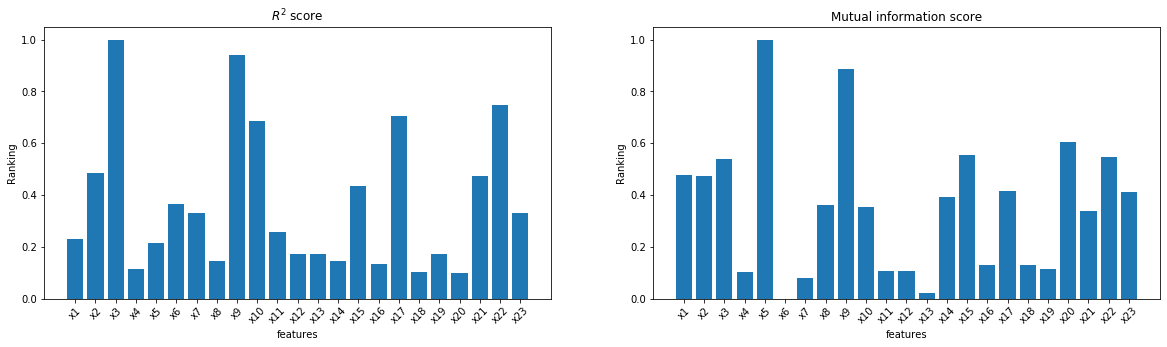

In [13]:
featureNames = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14',
                'x15','x16','x17','x18','x19','x20','x21','x22','x23','x24']
# son 24 variables porque hay 4 declaradas arriba (X1, X2, X3, X4) y 20 variables aleatorias que son ruido: en total 24.

# do calculations
f_test, _ = f_classif(X, y)
f_test /= np.max(f_test)

mi = mutual_info_classif(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),featureNames, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi,  align="center")
plt.xticks(range(X.shape[1]),featureNames, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

<div class = "alert alert-success">
**EJERCICIO:** Modifica los parámetros *mu*, y *sigma* y analiza sus efectos en las representaciones anteriores.  ¿Qué variable puedes considerar relevante?
</div>

# 3. Métodos de filtrado sobre problema realista

Vamos a aplicar los métodos de filtrado sobre la base de datos  de viviendas [House Sales in King COunty, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

Recordamos que para cada vivienda, se tienen los siguientes atributos, características o features:

| Atributo | descripción |
| :- |:- |
|*id*| identificador de la vivienda|
| *date*| fecha
| *price*| precio
| *bedrooms*| número de habitaciones
| *bathrooms*| número de baños/aseos
| *sqtf_living*| superficie habitable (en pies al cuadrado)
| *sqft_lot*| superficie de la parcela (en pies al cuadrado)
| *floors*| número de plantas
| *waterfront*| indica si la vivienda tiene acceso a un lago
| *view*| tipo de vista (variable numérica)
| *condition*| condición de la vivienda (variable númerica)
| *grade*| medida de la calidad de la construcción (variable numérica)
| *sqft_above*| superficie por encima del suelo (en pies al cuadrado)
| *sqft_basement*| superficie del sótano (en pies al cuadrado)
| *yr_built*| año de construcción de la vivienda
| *yr_renovated*| año de renovación de la vivienda
| *lat*| latitud de la parcela
| *long*| longitud de la parcela
| *sqft_living15*| superficie habitable promedio de los 15 vecinos más cercanos 				
| *sqft_lot15*| superficie de la parcela promedio de los 15 vecinos más cercanos



In [8]:
# cargamos datos
house_data = pd.read_csv("./data/kc_house_data.csv") # cargamos fichero

# Eliminamos las columnas id y date 
house_data = house_data.drop(['id','date'], axis=1)

# convertir las variables en pies al cuadrado en metros al cuadrado 
feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
house_data[feetFeatures] = house_data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

# renombramos
house_data.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                      'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                      'sqm_living15','sqm_lot15']

# añadimos las nuevas variables
house_data['years']            = 2015 - house_data['yr_built']
house_data['bedrooms_squared'] = house_data['bedrooms'].apply(lambda x: x**2)
house_data['bed_bath_rooms']   = house_data['bedrooms']*house_data['bathrooms']
house_data['log_sqm_living']   = house_data['sqm_living'].apply(lambda x: np.log(x))
house_data['lat_plus_long']    = house_data['lat']*house_data['long']

In [9]:
house_data.head()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,...,zip_code,lat,long,sqm_living15,sqm_lot15,years,bedrooms_squared,bed_bath_rooms,log_sqm_living,lat_plus_long
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,...,98178,47.5112,-122.257,124.490074,524.902176,60,9,3.00,4.697071,-5808.576778
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,...,98125,47.7210,-122.319,157.006138,709.686323,64,9,6.75,5.475462,-5837.184999
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,...,98028,47.7379,-122.233,252.696269,748.984308,82,4,2.00,4.270192,-5835.146731
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,...,98136,47.5208,-122.393,126.348134,464.515200,50,16,12.00,5.204501,-5816.213274
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,...,98074,47.6168,-122.045,167.225472,697.051509,28,9,6.00,5.050350,-5811.392356


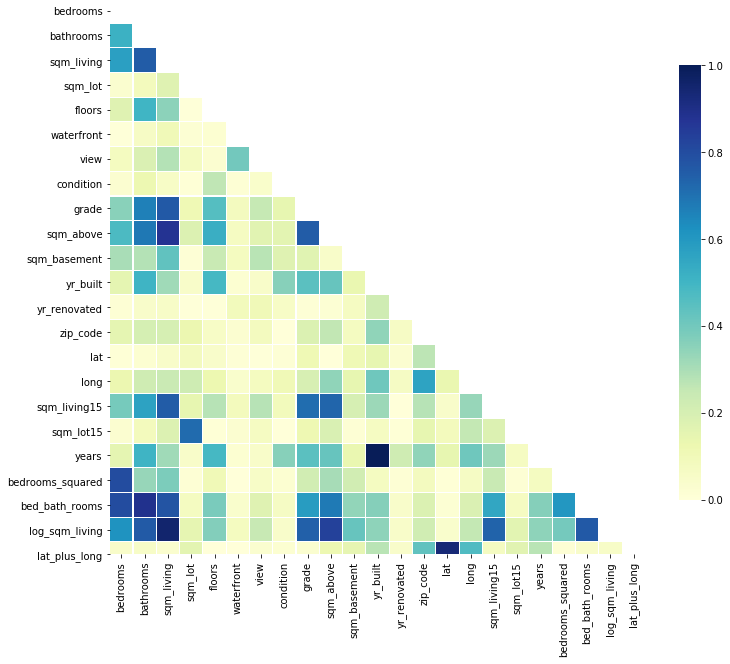

In [10]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(house_data.drop(['price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

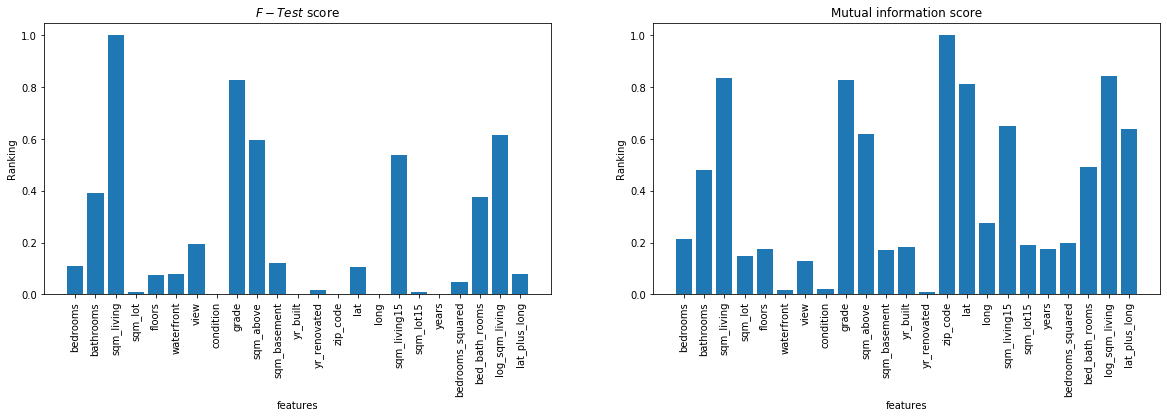

In [11]:
# convertimos el DataFrame al formato necesario para scikit-learn
data = house_data.values 

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = house_data.columns[1:]


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

<div class = "alert alert-success">
**EJERCICIO:** Las variables seleccionadas, ¿concuerdan con tu intuición?
</div>